In [70]:
#Install the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')



In [71]:
students = pd.read_csv('student_exam_scores.csv')
students.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [72]:
#Shape of the dataset
students.shape

(200, 6)

In [73]:
#Info about the dataset
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [74]:
#Summary statistics
students.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [75]:
#check for missing values
students.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

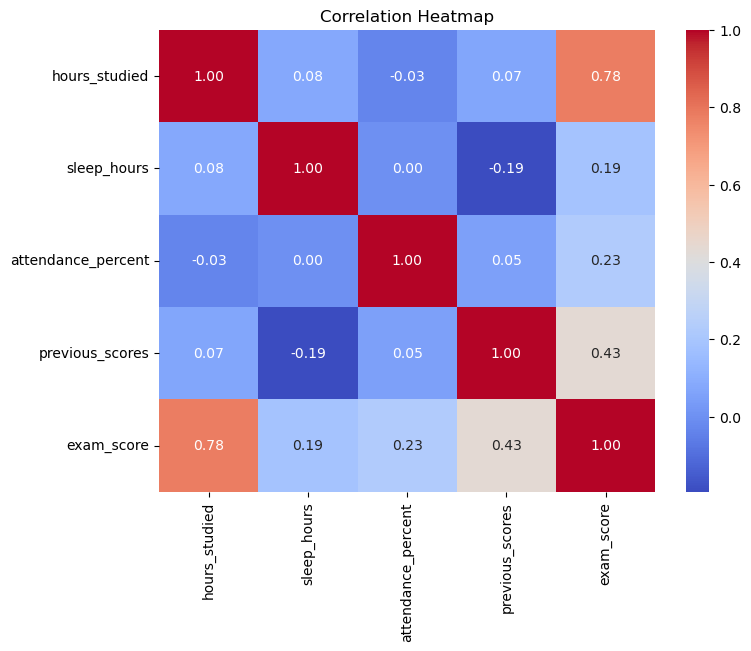

In [76]:
# Select only numeric columns
numeric_data = students.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Exploratory Data Analysis

### Distribution Analysis

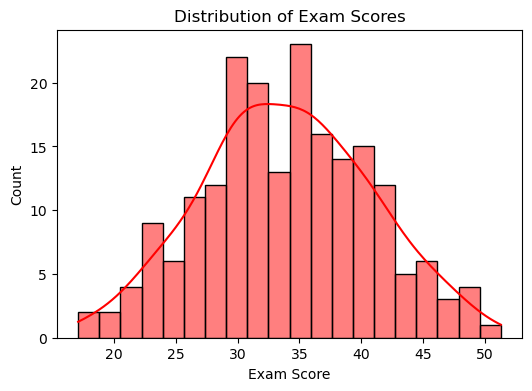

In [77]:
# Histogram of exam scores
plt.figure(figsize=(6,4))
sns.histplot(students['exam_score'], bins=20, color='red' ,kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

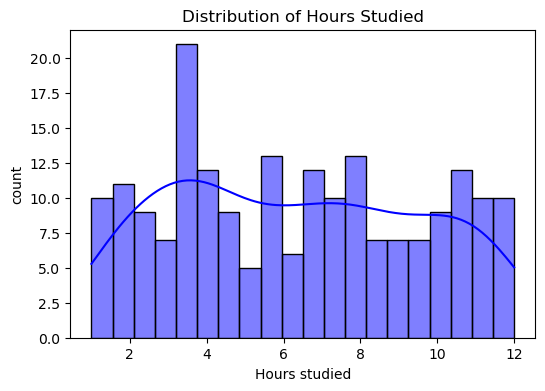

In [78]:
#Distribution of hours studied
plt.figure(figsize=(6,4))
sns.histplot(students['hours_studied'], bins=20, color='blue', kde=True)
plt.title("Distribution of Hours Studied")
plt.xlabel("Hours studied")
plt.ylabel("count")
plt.show()

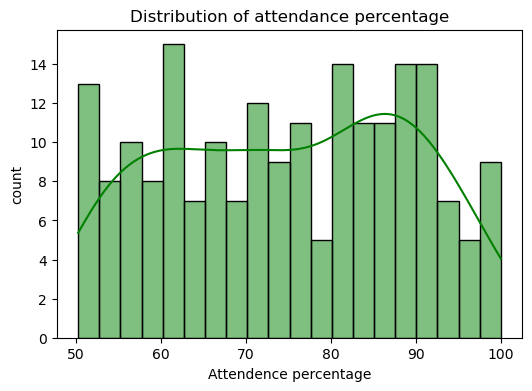

In [79]:
#Distribution of Attendance 
plt.figure(figsize=(6,4))
sns.histplot(students['attendance_percent'],bins=20,color='green',kde=True)
plt.title("Distribution of attendance percentage")
plt.xlabel("Attendence percentage")
plt.ylabel("count")
plt.show()

####  Relationship Analysis

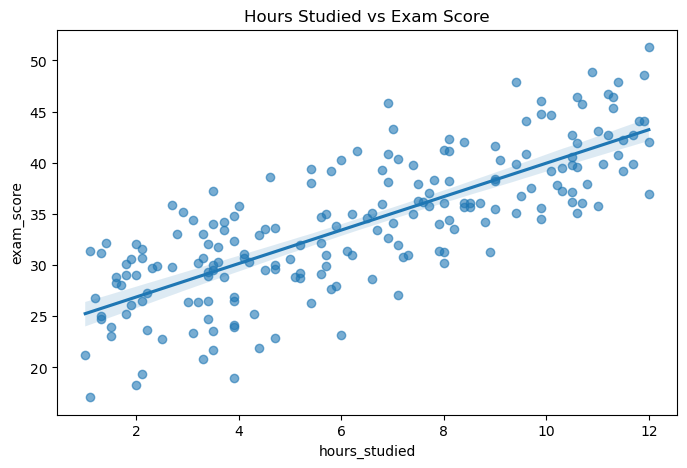

In [80]:
# Hours studied vs exam score
plt.figure(figsize=(8,5))
sns.regplot(x='hours_studied', y='exam_score', data=students, scatter_kws={'alpha':0.6})
plt.title("Hours Studied vs Exam Score")
plt.show()

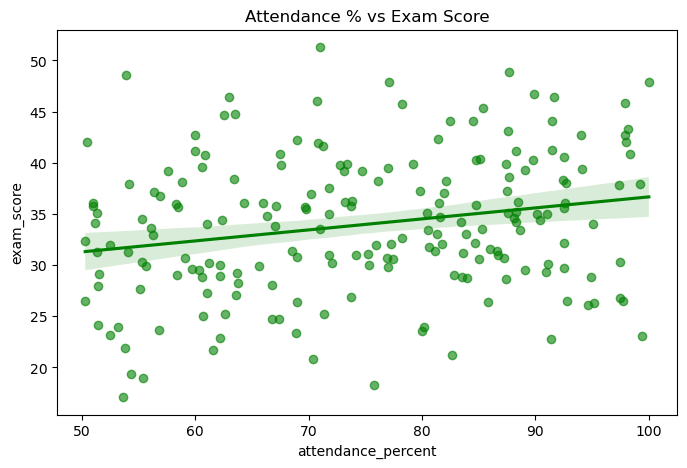

In [81]:
# Attendance vs exam score
plt.figure(figsize=(8,5))
sns.regplot(x='attendance_percent', y='exam_score', data=students, scatter_kws={'alpha':0.6}, color="green")
plt.title("Attendance % vs Exam Score")
plt.show()

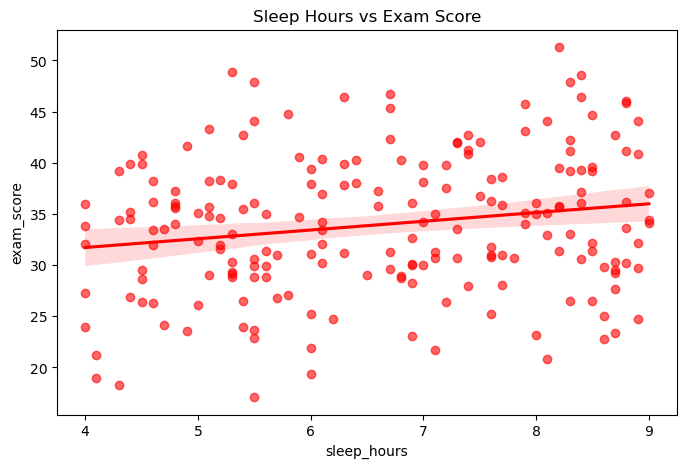

In [82]:
# Sleep hours vs exam score
plt.figure(figsize=(8,5))
sns.regplot(x='sleep_hours', y='exam_score', data=students, scatter_kws={'alpha':0.6}, color="red")
plt.title("Sleep Hours vs Exam Score")
plt.show()

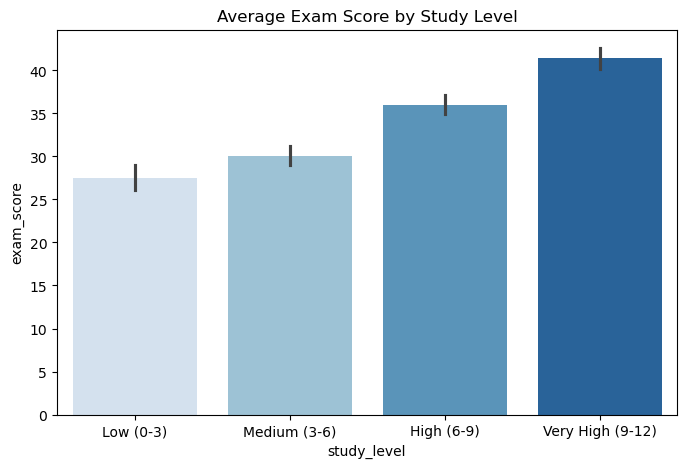

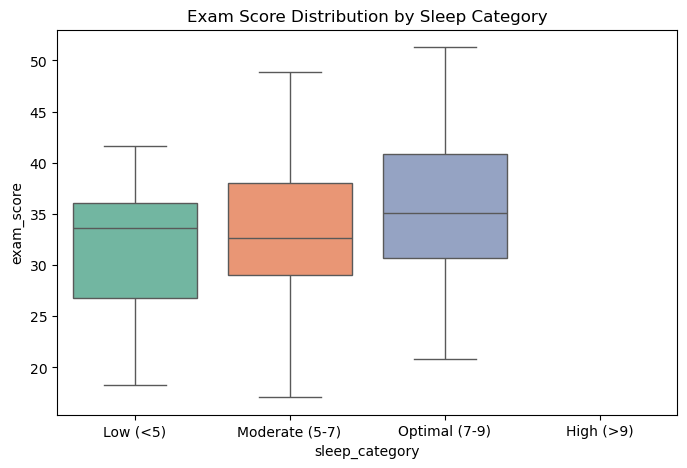

In [83]:
# Categorize students by hours studied
students['study_level'] = pd.cut(students['hours_studied'], 
                                 bins=[0,3,6,9,12], 
                                 labels=['Low (0-3)', 'Medium (3-6)', 'High (6-9)', 'Very High (9-12)'])

# Average exam score per study group
plt.figure(figsize=(8,5))
sns.barplot(x='study_level', y='exam_score', data=students, estimator=np.mean, palette="Blues")
plt.title("Average Exam Score by Study Level")
plt.show()

# Sleep category
students['sleep_category'] = pd.cut(students['sleep_hours'],
                                    bins=[0,5,7,9,12],
                                    labels=['Low (<5)', 'Moderate (5-7)', 'Optimal (7-9)', 'High (>9)'])

plt.figure(figsize=(8,5))
sns.boxplot(x='sleep_category', y='exam_score', data=students, palette="Set2")
plt.title("Exam Score Distribution by Sleep Category")
plt.show()
